In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.0 MB/s 
     |████████████████████████████████| 965 kB 65.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns

In [2]:
G = nx.read_graphml('/content/drive/MyDrive/dataset-flights-brazil-main/dataset-flights-brazil-main/data/air_traffic.graphml')

In [3]:
ar_brazil = []
for node in G.nodes():
  if G.nodes[node]['country'] == 'BRASIL':
    ar_brazil.append(node)

airports_brazil = G.subgraph(ar_brazil)


#Assortatividade

A assortativadade é uma metrica utilizada para avaliar a homofilia, que por sua vez indica a tendência de semelhantes se relacionarem/agruparem, um proverbio utilizado para descrever a homofilia ,do inglês, "birds of a feather flock
together", traduzindo para o português, "os pássaros da mesma pena voam juntos".

Em uma rede assortativa nós que possuem atributos em comum possuem uma maior probalidade de se conectarem.

Quanto mais próximo de 1, mais assortativa é a rede, quanto mais proxima de -1 menos assortativa é a rede.


## Gráfico considerando como grupo os aeroportos por região

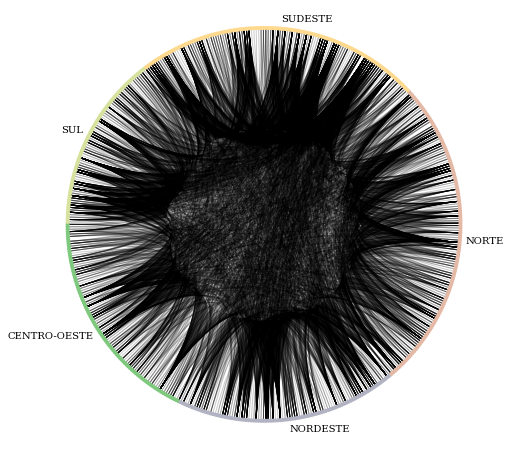

In [4]:
c = nv.CircosPlot(airports_brazil,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))


c.draw()



# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()


In [5]:
nx.attribute_assortativity_coefficient(airports_brazil, 'region')

0.36858192263245576

-1 < Coeficente, rede assortativa.

In [6]:
mixing_matrix = nx.attribute_mixing_matrix(airports_brazil,'region')
mixing_matrix

array([[0.0802305 , 0.0106383 , 0.01983599, 0.05529699, 0.01340869],
       [0.0106383 , 0.04986702, 0.02393617, 0.03291223, 0.01252216],
       [0.01983599, 0.02393617, 0.13652482, 0.02870124, 0.00742465],
       [0.05529699, 0.03291223, 0.02870124, 0.17242908, 0.03989362],
       [0.01340869, 0.01252216, 0.00742465, 0.03989362, 0.07180851]])

A matriz mostra a probabilidade da conexão entre os nós, considerando a região, nota-se a ocorrência de uma maior probabilidade nos elementos que compõem a diagonal principal, ou seja, conexão entre os aeroportos da mesma região. O que já era esperado, devido a homofilia. 

# Análise bivariada 

Essa análise foi realizada utilizando a correlação entre os graus dos nós, considerando o grau do nó e a média dos graus dos vizinhos, para o Brasil e as suas regiões, os resultados das analises são semelhantes, quando o grau do nó aumenta a medía dos graus dos vizinhos diminui. Considerando o coefiente de asssortivadade do grau da rede em todos os casos, Brasil e regiões, o valor do coeficiente foi negativo, isso representa uma rede desassortativa, um resultado esperado para aeroportos(aeroportos têm que estarem conectados com aeroportos de outras regiões).  

## Brasil

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


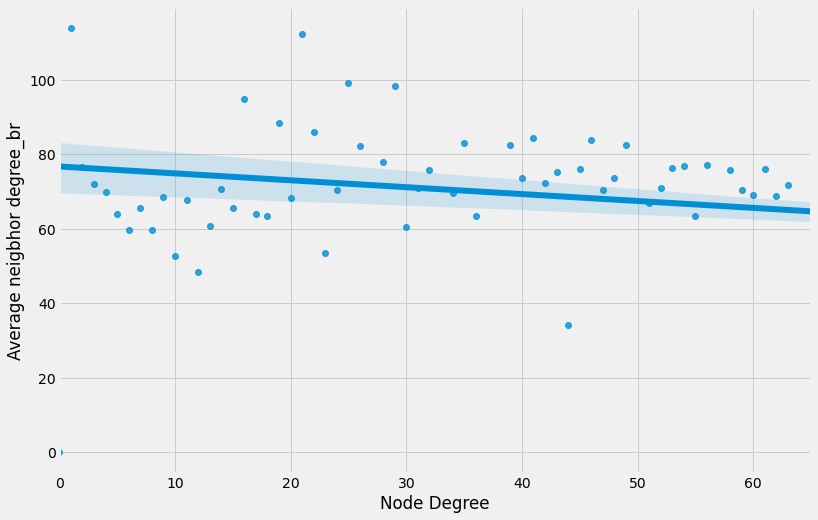

In [7]:
#Brasil
# average degree of neighbors
degree_br, avg_neigh_degree_br = zip(*nx.average_degree_connectivity(airports_brazil).items())

# convert to list
degree_br = list(degree_br)
avg_neigh_degree_br = list(avg_neigh_degree_br)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_br,avg_neigh_degree_br,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree_br")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [8]:
nx.degree_assortativity_coefficient(airports_brazil)

-0.19522933769365391

## Região norte

In [9]:
Norte = []
for node in airports_brazil.nodes():
  if airports_brazil.nodes[node]['region'] == 'NORTE':
    Norte.append(node)
north_region =  airports_brazil.subgraph(Norte)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


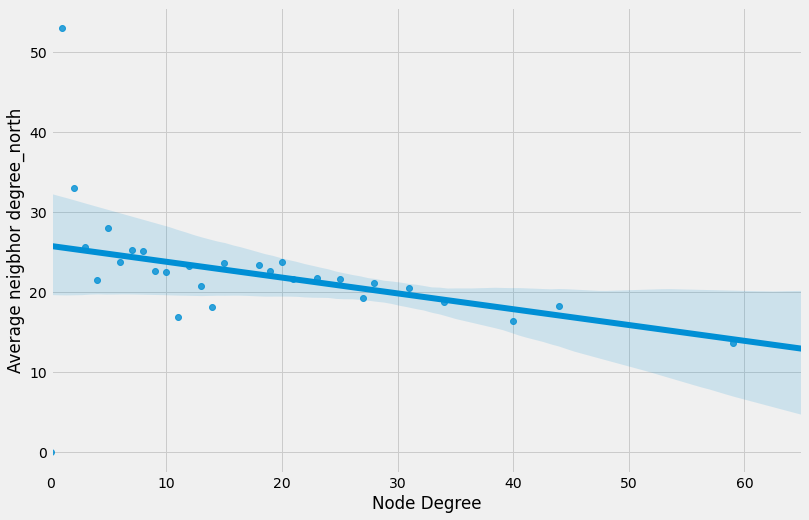

In [10]:
degree_north, avg_neigh_degree_north = zip(*nx.average_degree_connectivity(north_region).items())

# convert to list
degree_north = list(degree_north)
avg_neigh_degree_north = list(avg_neigh_degree_north)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_north,avg_neigh_degree_north,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree_north")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [11]:
nx.degree_assortativity_coefficient(north_region)

-0.2177920212034003

## Região nordeste

In [12]:
Nordeste = []
for node in airports_brazil.nodes():
  if airports_brazil.nodes[node]['region'] == 'NORDESTE':
    Nordeste.append(node)
northeast_region =  airports_brazil.subgraph(Nordeste)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


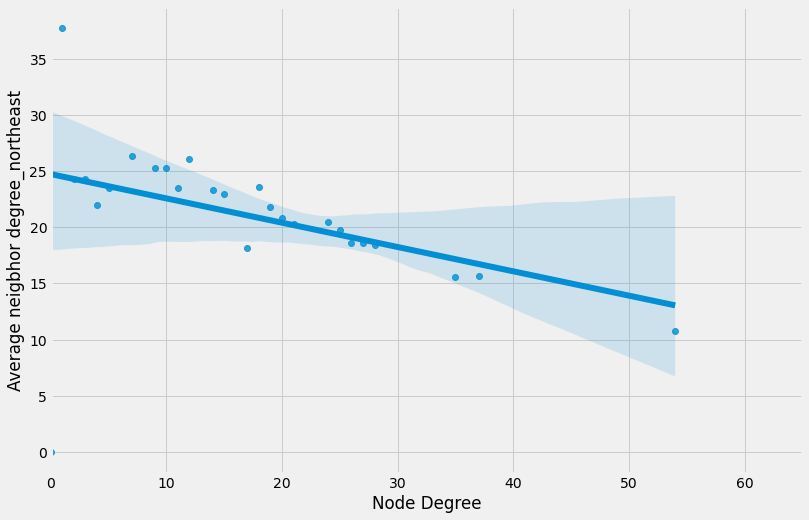

In [13]:
degree_northeast, avg_neigh_degree_northeast = zip(*nx.average_degree_connectivity(northeast_region).items())

# convert to list
degree_northeast = list(degree_northeast)
avg_neigh_degree_northeast = list(avg_neigh_degree_northeast)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_northeast,avg_neigh_degree_northeast,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree_northeast")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [14]:
nx.degree_assortativity_coefficient(northeast_region)

-0.31740910282280993

## Região sudeste

In [15]:
Sudeste = []
for node in airports_brazil.nodes():
  if airports_brazil.nodes[node]['region'] == 'SUDESTE':
    Sudeste.append(node)
southeast_region =  airports_brazil.subgraph(Sudeste)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


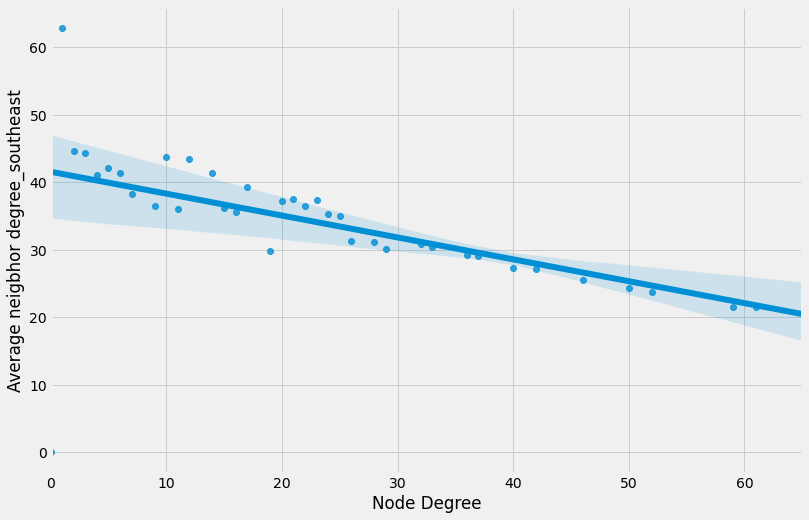

In [18]:
degree_southeast, avg_neigh_degree_southeast = zip(*nx.average_degree_connectivity(southeast_region).items())

# convert to list
degree_southeast = list(degree_southeast)
avg_neigh_degree_southeast = list(avg_neigh_degree_southeast)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_southeast,avg_neigh_degree_southeast,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree_southeast")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [17]:
nx.degree_assortativity_coefficient(southeast_region)

-0.3708675811720464

## Região Sul

In [19]:
Sul = []
for node in airports_brazil.nodes():
  if airports_brazil.nodes[node]['region'] == 'SUL':
    Sul.append(node)
south_region =  airports_brazil.subgraph(Sul)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


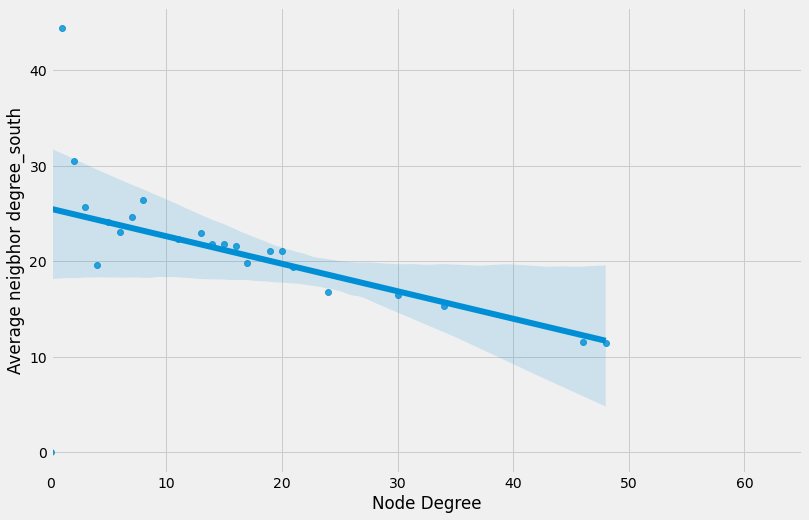

In [20]:
degree_south, avg_neigh_degree_south = zip(*nx.average_degree_connectivity(south_region).items())

# convert to list
degree_south = list(degree_south)
avg_neigh_degree_south = list(avg_neigh_degree_south)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_south,avg_neigh_degree_south,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree_south")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [21]:
nx.degree_assortativity_coefficient(south_region)

-0.3586586878829849

## Região centro-oeste

In [22]:
Centro = []
for node in airports_brazil.nodes():
  if airports_brazil.nodes[node]['region'] == 'CENTRO-OESTE':
    Centro.append(node)
midwest_region =  airports_brazil.subgraph(Centro)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


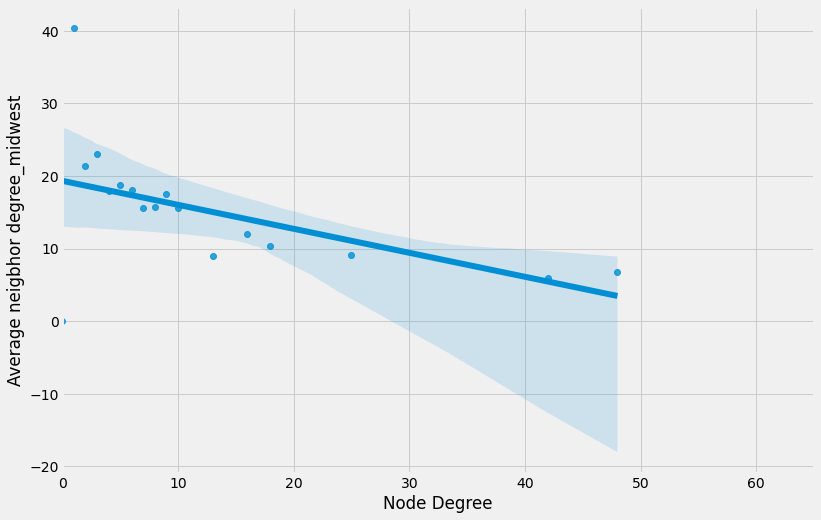

In [23]:
degree_midwest, avg_neigh_degree_midwest = zip(*nx.average_degree_connectivity(midwest_region).items())

# convert to list
degree_midwest = list(degree_midwest)
avg_neigh_degree_midwest = list(avg_neigh_degree_midwest)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_midwest,avg_neigh_degree_midwest,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree_midwest")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [24]:
nx.degree_assortativity_coefficient(midwest_region)

-0.35656661170467585

# Caminho mais curto

In [ ]:
Caminho mais curto é definido pelo menor número de arestas percorridas do nó origem até ao nó destino. 
Para essa análise foi selecionada uma cidade de cada região e avaliado o caminho mais curto entre elas na seguinte ordem: 
Norte -> Sul -> Nordeste -> Centro-oeste -> Sudeste 

In [25]:
#Destinos

cidade_norte = 'SBEG' #Manaus
cidade_sul = 'SBPA'   #Porto Alegre
cidade_nordeste = 'SBSV' #Salvador
cidade_centro = 'SBCF' #Belo horizonte
cidade_sudeste = 'SBRJ' #Rio de Janeiro

In [26]:
caminho1 = nx.shortest_path(airports_brazil, cidade_norte, cidade_sul)
caminho1

['SBEG', 'SBPA']

In [27]:
caminho2 = nx.shortest_path(airports_brazil, cidade_sul, cidade_nordeste)
caminho2

['SBPA', 'SBSV']

In [28]:
caminho3 = nx.shortest_path(airports_brazil, cidade_nordeste, cidade_centro)
caminho3

['SBSV', 'SBCF']

In [29]:
caminho4 = nx.shortest_path(airports_brazil, cidade_centro, cidade_sudeste)
caminho4

['SBCF', 'SBRJ']

Todas cidades escolhidas foram capitais, o comprimento do caminho mais curto indica nesse caso que existe uma conexão direta entre todos os aeroportos das cidades escolhidas. 

# Coeficiente de Clustering

O coeficiente de clusteting mede o quão próximo está um nó ou uma rede de uma topologia estrela , isto é se os elementos de uma rede ego estão conectados entre si. Caso o coeficiente de clustering seja 1, ele possui uma topologia estrela, todos os elementos da rede ego estão conectados entre si.
Para essa análise todos o coeficentes, Brasil e regiões, as médias dos coeficientes clustering são menores que 1. A região com a maior média é a região sudeste, o que é esperado pois a região concentra o maior número de aeroportos.  

## Brasil

In [30]:
nx.triangles(airports_brazil)

{'SBAF': 8,
 'SDMC': 6,
 'SSLS': 1,
 'SSGG': 1,
 'SWJH': 28,
 'SBJA': 108,
 'SWWA': 2,
 'SNQY': 107,
 'SWLB': 49,
 'SBAS': 152,
 'SNPJ': 8,
 'SNGA': 0,
 'SDTK': 41,
 'SSUW': 36,
 'SBAV': 3,
 'SWPJ': 1,
 'SNOX': 96,
 'SBPV': 1192,
 'SBYA': 1,
 'SNVS': 48,
 'SNML': 0,
 'SBMN': 327,
 'SBVH': 258,
 'SWCP': 3,
 'SBCN': 257,
 'SNBA': 75,
 'SWPC': 0,
 'SSCP': 5,
 'SBJH': 0,
 'SSUM': 15,
 'SDH2': 9,
 'SNHS': 1,
 'SBTE': 1032,
 'SIZX': 13,
 'SNWS': 0,
 'SBDN': 1087,
 'SSBE': 0,
 'SNKE': 29,
 'SWBZ': 18,
 'SBMK': 975,
 'SWRP': 25,
 'SWBI': 5,
 'SBBQ': 17,
 'SWXM': 6,
 'SWLF': 0,
 'SBMC': 52,
 'SNAT': 18,
 'SNMU': 137,
 'SSVL': 4,
 'SJKB': 9,
 'SWCB': 0,
 'SNTF': 52,
 'SBTV': 6,
 'SBCV': 87,
 'SWCA': 51,
 'SBAX': 301,
 'SBGP': 28,
 'SNBV': 1,
 'SWUQ': 7,
 'SSLT': 7,
 'SJCW': 0,
 'SSKW': 58,
 'SBPC': 50,
 'SDOV': 1,
 'SBDB': 53,
 'SNGV': 108,
 'SNGI': 38,
 'SWJP': 15,
 'SNMZ': 41,
 'SBBT': 206,
 'SWBE': 0,
 'SBCF': 2459,
 'SWJN': 43,
 'SIXE': 0,
 'SBAC': 9,
 'SWTU': 17,
 'SBMY': 33,
 'SBJR': 129,


In [31]:
nx.clustering(airports_brazil)

{'SBAF': 0.8,
 'SDMC': 1.0,
 'SSLS': 1.0,
 'SSGG': 1.0,
 'SWJH': 0.509090909090909,
 'SBJA': 0.9,
 'SWWA': 0.6666666666666666,
 'SNQY': 0.6257309941520468,
 'SWLB': 0.6282051282051282,
 'SBAS': 0.9934640522875817,
 'SNPJ': 0.8,
 'SNGA': 0,
 'SDTK': 0.7454545454545455,
 'SSUW': 0.8,
 'SBAV': 1.0,
 'SWPJ': 1.0,
 'SNOX': 0.6274509803921569,
 'SBPV': 0.3868873742291464,
 'SBYA': 1.0,
 'SNVS': 0.7272727272727273,
 'SNML': 0,
 'SBMN': 0.5190476190476191,
 'SBVH': 0.5548387096774193,
 'SWCP': 1.0,
 'SBCN': 0.7907692307692308,
 'SNBA': 0.9615384615384616,
 'SWPC': 0,
 'SSCP': 0.8333333333333334,
 'SBJH': 0,
 'SSUM': 0.7142857142857143,
 'SDH2': 0.6,
 'SNHS': 1.0,
 'SBTE': 0.6243194192377496,
 'SIZX': 0.6190476190476191,
 'SNWS': 0,
 'SBDN': 0.5748281332628239,
 'SSBE': 0,
 'SNKE': 0.8055555555555556,
 'SWBZ': 0.8571428571428571,
 'SBMK': 0.49923195084485406,
 'SWRP': 0.5555555555555556,
 'SWBI': 0.8333333333333334,
 'SBBQ': 0.8095238095238095,
 'SWXM': 1.0,
 'SWLF': 0,
 'SBMC': 0.7878787878787

In [32]:
nx.average_clustering(airports_brazil)

0.6310139004172535

## Região Norte

In [33]:
nx.triangles(north_region)

{'SJGU': 0,
 'SWJI': 23,
 'SBCJ': 111,
 'SWUI': 1,
 'SWLB': 49,
 'SBIH': 174,
 'SWMK': 1,
 'SISO': 0,
 'SNSH': 85,
 'SBTS': 17,
 'SWII': 15,
 'SBMQ': 186,
 'SNYV': 0,
 'SWTP': 9,
 'SWGI': 60,
 'SWNO': 12,
 'SWPJ': 0,
 'SBYA': 1,
 'SNOX': 96,
 'SBPV': 182,
 'SBGM': 1,
 'SNVS': 48,
 'SBMN': 86,
 'SNNC': 0,
 'SBVH': 18,
 'SBAM': 1,
 'SBOI': 8,
 'SWFN': 45,
 'SNLA': 3,
 'SWJV': 1,
 'SNCC': 1,
 'SBUA': 22,
 'SWPC': 0,
 'SBTB': 103,
 'SNBW': 1,
 'SWPD': 6,
 'SWQR': 5,
 'SBEK': 7,
 'SNFX': 30,
 'SBTK': 5,
 'SWSI': 19,
 'SNQW': 0,
 'SNKE': 20,
 'SWEE': 2,
 'SNDC': 57,
 'SNDB': 3,
 'SWBI': 5,
 'SBJI': 24,
 'SBMA': 132,
 'SNNG': 10,
 'SWMW': 42,
 'SJLM': 0,
 'SNCB': 1,
 'SDCG': 14,
 'SBTU': 103,
 'SWNK': 34,
 'SNEB': 4,
 'SWCA': 45,
 'SNBV': 1,
 'SBBE': 280,
 'SBCC': 0,
 'SWUQ': 7,
 'SNYA': 42,
 'SJCW': 0,
 'SSKW': 4,
 '1AON': 21,
 'SNTI': 100,
 'SDWQ': 21,
 'SNMD': 11,
 'SBER': 0,
 'SNSW': 6,
 'SNCI': 0,
 'SWOB': 41,
 'SWSQ': 1,
 'SJLU': 1,
 'SWJP': 15,
 'SNMZ': 41,
 'SWBR': 9,
 'SBRB': 100,
 '

In [34]:
nx.clustering(north_region)

{'SJGU': 0,
 'SWJI': 0.6388888888888888,
 'SBCJ': 0.5842105263157895,
 'SWUI': 1.0,
 'SWLB': 0.6282051282051282,
 'SBIH': 0.3741935483870968,
 'SWMK': 1.0,
 'SISO': 0,
 'SNSH': 0.49707602339181284,
 'SBTS': 0.6071428571428571,
 'SWII': 1.0,
 'SBMQ': 0.3315508021390374,
 'SNYV': 0,
 'SWTP': 0.9,
 'SWGI': 0.6593406593406593,
 'SWNO': 0.42857142857142855,
 'SWPJ': 0,
 'SBYA': 1.0,
 'SNOX': 0.6274509803921569,
 'SBPV': 0.23333333333333334,
 'SBGM': 1.0,
 'SNVS': 0.7272727272727273,
 'SBMN': 0.45263157894736844,
 'SNNC': 0,
 'SBVH': 0.5,
 'SBAM': 1.0,
 'SBOI': 0.8,
 'SWFN': 0.29411764705882354,
 'SNLA': 1.0,
 'SWJV': 1.0,
 'SNCC': 1.0,
 'SBUA': 0.4,
 'SWPC': 0,
 'SBTB': 0.673202614379085,
 'SNBW': 1.0,
 'SWPD': 1.0,
 'SWQR': 0.8333333333333334,
 'SBEK': 0.4666666666666667,
 'SNFX': 0.8333333333333334,
 'SBTK': 0.8333333333333334,
 'SWSI': 0.5277777777777778,
 'SNQW': 0,
 'SNKE': 0.9523809523809523,
 'SWEE': 0.6666666666666666,
 'SNDC': 0.6263736263736264,
 'SNDB': 1.0,
 'SWBI': 0.8333333333

In [35]:
nx.average_clustering(north_region)

0.6124990658608361

## Região Nordeste

In [36]:
nx.triangles(northeast_region)

{'SNCL': 1,
 'SNRS': 0,
 'SNAH': 0,
 'SSLS': 0,
 'SNUU': 0,
 'SNQY': 59,
 'SNBU': 0,
 'SBSV': 230,
 'SBSL': 115,
 'SNJO': 1,
 'SNOB': 0,
 'SBNT': 177,
 'SNML': 0,
 'SNKB': 1,
 'SNIC': 1,
 'SNVB': 15,
 'SBPL': 158,
 'SSSK': 0,
 'SNUC': 6,
 'SBVC': 28,
 'SBFE': 10,
 'SNHS': 1,
 'SBTE': 97,
 'SBMS': 37,
 'SNWS': 0,
 'SBUF': 45,
 'SNDM': 6,
 'SNBR': 51,
 'SBTC': 50,
 'SNAV': 0,
 'SDLK': 0,
 'SNAT': 8,
 'SNMU': 7,
 'SNDH': 1,
 'SNDQ': 0,
 'SNTF': 5,
 'SBTV': 0,
 'SBCV': 4,
 'SNVV': 1,
 'SNVR': 0,
 'SNRU': 36,
 'SNGI': 5,
 'SBJE': 34,
 'SNAB': 0,
 'SIBU': 3,
 'SSRS': 2,
 'SWBE': 0,
 'SBMO': 178,
 'SNBI': 0,
 'SNPC': 0,
 'SNBS': 0,
 'SBIL': 104,
 'SNTS': 30,
 'SWNB': 1,
 'SWRF': 0,
 'SBLE': 18,
 'SBJU': 158,
 'SBAC': 6,
 'SBFN': 51,
 'SNMJ': 0,
 'SNBX': 0,
 'SIRI': 1,
 'SNQM': 0,
 'SBIZ': 75,
 'SBKG': 111,
 'SNIP': 1,
 'SBPB': 63,
 '2NHT': 3,
 'SNIG': 2,
 'SBJP': 181,
 'SNQX': 0,
 'SBSG': 112,
 'SBCI': 0,
 'SNJD': 3,
 'SNKK': 20,
 'SBPS': 151,
 'SNQD': 32,
 'SNVC': 0,
 'SNJB': 1,
 'SNSG': 0,


In [37]:
nx.clustering(northeast_region)

{'SNCL': 1.0,
 'SNRS': 0,
 'SNAH': 0,
 'SSLS': 0,
 'SNUU': 0,
 'SNQY': 0.5619047619047619,
 'SNBU': 0,
 'SBSV': 0.1607267645003494,
 'SBSL': 0.5476190476190477,
 'SNJO': 1.0,
 'SNOB': 0,
 'SBNT': 0.5042735042735043,
 'SNML': 0,
 'SNKB': 1.0,
 'SNIC': 1.0,
 'SNVB': 0.7142857142857143,
 'SBPL': 0.572463768115942,
 'SSSK': 0,
 'SNUC': 1.0,
 'SBVC': 0.7777777777777778,
 'SBFE': 1.0,
 'SNHS': 1.0,
 'SBTE': 0.5672514619883041,
 'SBMS': 0.6727272727272727,
 'SNWS': 0,
 'SBUF': 1.0,
 'SNDM': 1.0,
 'SNBR': 0.375,
 'SBTC': 0.7575757575757576,
 'SNAV': 0,
 'SDLK': 0,
 'SNAT': 0.8,
 'SNMU': 0.7,
 'SNDH': 1.0,
 'SNDQ': 0,
 'SNTF': 0.5,
 'SBTV': 0,
 'SBCV': 0.6666666666666666,
 'SNVV': 1.0,
 'SNVR': 0,
 'SNRU': 1.0,
 'SNGI': 0.5,
 'SBJE': 0.9444444444444444,
 'SNAB': 0,
 'SIBU': 1.0,
 'SSRS': 0.6666666666666666,
 'SWBE': 0,
 'SBMO': 0.4708994708994709,
 'SNBI': 0,
 'SNPC': 0,
 'SNBS': 0,
 'SBIL': 0.5473684210526316,
 'SNTS': 0.6666666666666666,
 'SWNB': 1.0,
 'SWRF': 0,
 'SBLE': 0.8571428571428571,


In [38]:
nx.average_clustering(northeast_region)

0.4719877188787716

## Região Sudeste

In [40]:
nx.triangles(southeast_region)

{'SBAF': 8,
 'SNDT': 7,
 'SBAG': 38,
 'SDMC': 6,
 'SDSC': 168,
 'SNAR': 6,
 'SBSC': 5,
 'SBAS': 45,
 'SDRS': 17,
 'SNOS': 4,
 'SNPJ': 8,
 'SNGA': 0,
 'SNJM': 5,
 'SDTK': 41,
 'SBAV': 3,
 'SNKI': 1,
 'SNJR': 36,
 'SNXB': 0,
 'SNPX': 6,
 'SBIP': 256,
 'SNPD': 60,
 'SBRJ': 512,
 'SBAQ': 201,
 'SNAP': 0,
 'SBCB': 122,
 'SBGR': 552,
 'SNGX': 3,
 'SBUR': 340,
 'SDIM': 0,
 'SBBZ': 69,
 'SBMM': 0,
 'SNBA': 15,
 'SBLS': 6,
 'SNMK': 12,
 'SBJH': 0,
 'SNUI': 11,
 'SNJN': 6,
 'SBBP': 0,
 'SBSP': 561,
 'SDBB': 0,
 'SBDN': 216,
 'SDLU': 0,
 'SNYB': 6,
 'SDUB': 3,
 'SBMK': 165,
 'SNNT': 0,
 'SBBQ': 13,
 'SDOU': 6,
 'SJTC': 106,
 'SWLF': 0,
 'SNFE': 15,
 'SBME': 218,
 'SNUB': 0,
 'SBMT': 79,
 'SBJF': 200,
 'SBSJ': 371,
 'SDVG': 43,
 'SBAX': 139,
 'SBGP': 10,
 'SDDM': 0,
 'SBJD': 203,
 'SNZR': 9,
 'SBRP': 413,
 'SBPI': 0,
 'SNCX': 0,
 'SDVE': 0,
 'SNLO': 0,
 'SDBK': 21,
 'SBPC': 50,
 'SBYS': 1,
 'SNZA': 12,
 'SBGV': 163,
 'SBLN': 2,
 'SNUH': 3,
 'SNGV': 59,
 'SBSR': 340,
 'SSZW': 1,
 'SBGL': 470,
 'SBB

In [41]:
nx.clustering(southeast_region)

{'SBAF': 0.8,
 'SNDT': 0.7,
 'SBAG': 0.8444444444444444,
 'SDMC': 1.0,
 'SDSC': 0.8,
 'SNAR': 1.0,
 'SBSC': 0.8333333333333334,
 'SBAS': 1.0,
 'SDRS': 0.8095238095238095,
 'SNOS': 0.6666666666666666,
 'SNPJ': 0.8,
 'SNGA': 0,
 'SNJM': 0.8333333333333334,
 'SDTK': 0.7454545454545455,
 'SBAV': 1.0,
 'SNKI': 1.0,
 'SNJR': 1.0,
 'SNXB': 0,
 'SNPX': 1.0,
 'SBIP': 0.5161290322580645,
 'SNPD': 0.5,
 'SBRJ': 0.2992402104032729,
 'SBAQ': 0.8701298701298701,
 'SNAP': 0,
 'SBCB': 0.8970588235294118,
 'SBGR': 0.3016393442622951,
 'SNGX': 1.0,
 'SBUR': 0.5396825396825397,
 'SDIM': 0,
 'SBBZ': 0.7582417582417582,
 'SBMM': 0,
 'SNBA': 1.0,
 'SBLS': 1.0,
 'SNMK': 0.8,
 'SBJH': 0,
 'SNUI': 0.7333333333333333,
 'SNJN': 1.0,
 'SBBP': 0,
 'SBSP': 0.2462686567164179,
 'SDBB': 0,
 'SBDN': 0.72,
 'SDLU': 0,
 'SNYB': 1.0,
 'SDUB': 1.0,
 'SBMK': 0.7142857142857143,
 'SNNT': 0,
 'SBBQ': 0.8666666666666667,
 'SDOU': 0.6,
 'SJTC': 0.8833333333333333,
 'SWLF': 0,
 'SNFE': 0.7142857142857143,
 'SBME': 0.57671957671

In [42]:
nx.average_clustering(southeast_region)

0.6175309816849806

## Região Centro-oeste

In [43]:
nx.triangles(midwest_region)

{'SWNS': 1,
 'SWJH': 11,
 'SWWA': 2,
 'SSND': 3,
 'SBDO': 1,
 'SWLV': 0,
 'SSTL': 0,
 'SBCG': 35,
 'SJDB': 1,
 'SWJQ': 0,
 'SBIT': 1,
 'SWCP': 3,
 'SBCN': 3,
 'SWHP': 16,
 'SSNC': 0,
 'SBAN': 1,
 'SSBB': 0,
 'SDH2': 7,
 'SWPH': 3,
 'SBCY': 109,
 'SIZX': 11,
 'SWWU': 0,
 'SSBE': 0,
 'SWBZ': 2,
 'SSNM': 1,
 'SWNQ': 5,
 'SWRP': 19,
 'SWKC': 0,
 'SWXM': 0,
 'SBMC': 8,
 'SWTS': 12,
 'SBTG': 1,
 'SSAC': 0,
 'SBPP': 1,
 'SBSO': 13,
 'SJKB': 9,
 'SWCB': 0,
 'SWVR': 1,
 'SBAT': 16,
 'SWIQ': 8,
 'SWMP': 2,
 'SWKN': 1,
 'SWDE': 0,
 'SJQP': 0,
 'SDOV': 1,
 'SWGP': 1,
 'SWYY': 0,
 'SBDB': 3,
 'SILC': 7,
 'SJVO': 0,
 'SWHG': 2,
 'SIKC': 1,
 'SWXV': 7,
 'SWRD': 18,
 'SWJN': 30,
 'SWBU': 0,
 'SIQE': 0,
 'SWYK': 3,
 'SWLC': 13,
 'SWVC': 8,
 'SWFE': 1,
 'SWTU': 13,
 'SBGO': 68,
 'SWEK': 9,
 'SNXL': 1,
 'SBSI': 16,
 'SBBR': 56,
 'SWDB': 0,
 'SWPY': 3,
 'SBCR': 11,
 'SWJW': 0,
 'SDNM': 5,
 'SWDM': 2,
 'SSOU': 4,
 'SSDO': 6,
 'SWJU': 12,
 'SBRD': 6,
 'SWNH': 1,
 'SWCI': 6,
 'SWBG': 3,
 'SSCL': 0,
 'SWFX': 

In [44]:
nx.clustering(midwest_region)

{'SWNS': 1.0,
 'SWJH': 0.5238095238095238,
 'SWWA': 0.6666666666666666,
 'SSND': 1.0,
 'SBDO': 1.0,
 'SWLV': 0,
 'SSTL': 0,
 'SBCG': 0.22875816993464052,
 'SJDB': 1.0,
 'SWJQ': 0,
 'SBIT': 1.0,
 'SWCP': 1.0,
 'SBCN': 1.0,
 'SWHP': 0.35555555555555557,
 'SSNC': 0,
 'SBAN': 1.0,
 'SSBB': 0,
 'SDH2': 0.7,
 'SWPH': 1.0,
 'SBCY': 0.09663120567375887,
 'SIZX': 0.7333333333333333,
 'SWWU': 0,
 'SSBE': 0,
 'SWBZ': 0.6666666666666666,
 'SSNM': 1.0,
 'SWNQ': 0.8333333333333334,
 'SWRP': 0.6785714285714286,
 'SWKC': 0,
 'SWXM': 0,
 'SBMC': 0.8,
 'SWTS': 0.42857142857142855,
 'SBTG': 1.0,
 'SSAC': 0,
 'SBPP': 1.0,
 'SBSO': 0.8666666666666667,
 'SJKB': 0.9,
 'SWCB': 0,
 'SWVR': 1.0,
 'SBAT': 0.35555555555555557,
 'SWIQ': 0.5333333333333333,
 'SWMP': 0.6666666666666666,
 'SWKN': 1.0,
 'SWDE': 0,
 'SJQP': 0,
 'SDOV': 1.0,
 'SWGP': 1.0,
 'SWYY': 0,
 'SBDB': 1.0,
 'SILC': 0.4666666666666667,
 'SJVO': 0,
 'SWHG': 0.6666666666666666,
 'SIKC': 1.0,
 'SWXV': 0.7,
 'SWRD': 0.5,
 'SWJN': 0.38461538461538464,

In [45]:
nx.average_clustering(midwest_region)

0.5511670869789284

## Região Sul

In [46]:
nx.triangles(south_region)

{'SSAB': 0,
 'SBPA': 214,
 'SSAP': 5,
 'SSEP': 3,
 'SSPI': 0,
 'SBPK': 106,
 'SBTD': 24,
 'SBTR': 0,
 'SBJV': 83,
 'SSVI': 20,
 'SSOG': 8,
 'SSGG': 0,
 'SBBI': 11,
 'SSHZ': 3,
 'SSPK': 1,
 'SBJA': 10,
 'SBCA': 82,
 'SBBG': 13,
 'SNEE': 1,
 'SSNH': 1,
 'SBGU': 1,
 'SSBG': 0,
 'SBSM': 120,
 'SBCO': 0,
 'SSCK': 46,
 'SBPG': 0,
 'SBLJ': 62,
 'SBCX': 121,
 'SSCC': 8,
 'SBTL': 0,
 'SBRG': 18,
 'SSER': 91,
 'SBFL': 183,
 'SSVL': 4,
 'SBGS': 1,
 'SBFI': 103,
 'SSTE': 0,
 'SSZR': 37,
 'SSUW': 26,
 'SSCT': 2,
 'SBUG': 71,
 'SNCP': 6,
 'SBPO': 9,
 'SSSB': 1,
 'SIXE': 0,
 'SSCN': 1,
 'SBNF': 83,
 'SSGY': 0,
 'SSKM': 1,
 'SBCM': 51,
 'SSJA': 75,
 'SJRG': 6,
 'SBNM': 84,
 'SBCD': 73,
 'SSSC': 0,
 'SSOE': 14,
 'SBCT': 227,
 'SSUV': 1,
 'SSIJ': 3,
 'SBCH': 204,
 'SSPG': 1,
 'SBMG': 63,
 'SSLT': 7,
 'SBPF': 134,
 'SSCP': 5,
 'SBLO': 112,
 'SBMH': 28,
 'SSTD': 15,
 'SSBN': 0,
 'SSCR': 0,
 'SSFB': 22,
 'SSAE': 0,
 'SSUM': 10}

In [47]:
nx.clustering(south_region)

{'SSAB': 0,
 'SBPA': 0.20676328502415459,
 'SSAP': 0.8333333333333334,
 'SSEP': 1.0,
 'SSPI': 0,
 'SBPK': 0.6198830409356725,
 'SBTD': 0.8571428571428571,
 'SBTR': 0,
 'SBJV': 0.6916666666666667,
 'SSVI': 0.9523809523809523,
 'SSOG': 0.5333333333333333,
 'SSGG': 0,
 'SBBI': 0.7333333333333333,
 'SSHZ': 1.0,
 'SSPK': 1.0,
 'SBJA': 1.0,
 'SBCA': 0.6029411764705882,
 'SBBG': 0.6190476190476191,
 'SNEE': 1.0,
 'SSNH': 1.0,
 'SBGU': 1.0,
 'SSBG': 0,
 'SBSM': 0.43478260869565216,
 'SBCO': 0,
 'SSCK': 0.8363636363636363,
 'SBPG': 0,
 'SBLJ': 0.6813186813186813,
 'SBCX': 0.6368421052631579,
 'SSCC': 0.8,
 'SBTL': 0,
 'SBRG': 0.8571428571428571,
 'SSER': 0.6691176470588235,
 'SBFL': 0.4206896551724138,
 'SSVL': 0.6666666666666666,
 'SBGS': 1.0,
 'SBFI': 0.49047619047619045,
 'SSTE': 0,
 'SSZR': 0.6727272727272727,
 'SSUW': 0.9285714285714286,
 'SSCT': 0.6666666666666666,
 'SBUG': 0.6761904761904762,
 'SNCP': 0.6,
 'SBPO': 0.6,
 'SSSB': 1.0,
 'SIXE': 0,
 'SSCN': 1.0,
 'SBNF': 0.6916666666666667,

In [48]:
nx.average_clustering(south_region)

0.5968552724314078